In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#file = 'WDIW Dataset.xlsx'
#hot_rod = pd.read_excel(file)
#hot_rod = hot_rod.loc[hot_rod['Cool Name'].str.contains('Hot Rod')]


In [4]:


#change the type if its need it


# Reading file
wdiw_data = pd.read_excel('WDIW dataset.xlsx')
#wdiw_meta = pd.read_excel('WDI_Metadata.xlsx')

#Filtering out everything except the 'Hot Rod' values.
wdiw_hr = wdiw_data.loc[wdiw_data['Cool Name'] == 'Hot Rod']

#types:
#wdiw_hr.info()
#The numeric variables are floats! We wont change the type

#Looking for missing value
missing_values= wdiw_hr.isnull().sum()
#print(missing_values)

#Missing values
#pd.set_option('display.max_rows', 410)
#print(missing_values)

#Percentage of missing values
#percentage_missing=wdiw_hr.isnull().mean().round(2)*100
#print(percentage_missing)


#Flag the missing values
#for col in wdiw_hr:     
#    if wdiw_hr[col].isnull().astype(int).sum() > 0:       
#        wdiw_hr['m_' + col] = wdiw_hr[col].isnull().astype(int)
#Create a new file
#wdiw_hr.to_excel('wdiw_hr_after_flags.xlsx')

#reloading the file again with the flags 
#file = 'wdiw_hr_after_flags.xlsx'
#wdiw_hr = pd.read_excel(file)
#Input the missing values

#Grouping data for filling
#for col in wdiw_hr['Country code']:
    
# Merge Data with Income group
meta_data_sheet_2 = pd.read_excel('WDI_Metadata.xlsx', sheet_name = 'Country - Metadata')
wdiw_hr.insert(2, 'Income Group', wdiw_hr['Country Code'].map(meta_data_sheet_2.set_index('Code')['Income Group']))
#print(wdiw_hr)

In [14]:
file_with_missing_values = pd.read_excel('API_Download_DS2_en_excel_v2_452807.xls', sheet_name = 'Data')

for col, value in wdiw_hr.iteritems():
    if wdiw_hr[col].isnull().astype(int) > 0: 
        wdiw_hr[value, col].replace(to_replace = np.nan, value = "MISSING VALUE FILLED")
        

wdiw_hr

        
        
#file_with_missing_values.loc[(file_with_missing_values['Indicator Name'] == col) \
 #                       & (file_with_missing_values['Country Code'] == wdiw_hr[col])        

KeyError: 'Country Code'

In [31]:
#hot_rod.info()

In [35]:
#EV = hot_rod.dropna(axis = 1, how = 'any')


EV_no_Bermuda = wdiw_hr.drop([21]).dropna(axis = 1, how = 'any')

EV_no_Bermuda_High = EV_no_Bermuda.loc[EV_no_Bermuda['Income Group'] == 'High income']
EV_no_Bermuda_Upper_middle = EV_no_Bermuda.loc[EV_no_Bermuda['Income Group'] == 'Upper middle income']
EV_no_Bermuda_Lower_middle = EV_no_Bermuda.loc[EV_no_Bermuda['Income Group'] == 'Lower middle income']
EV_no_Bermuda_Low = EV_no_Bermuda.loc[EV_no_Bermuda['Income Group'] == 'Low income']




In [34]:
#pd.set_option("display.max_columns",40)
#EV_no_Bermuda.describe().round(2)

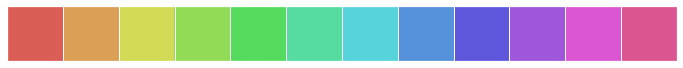

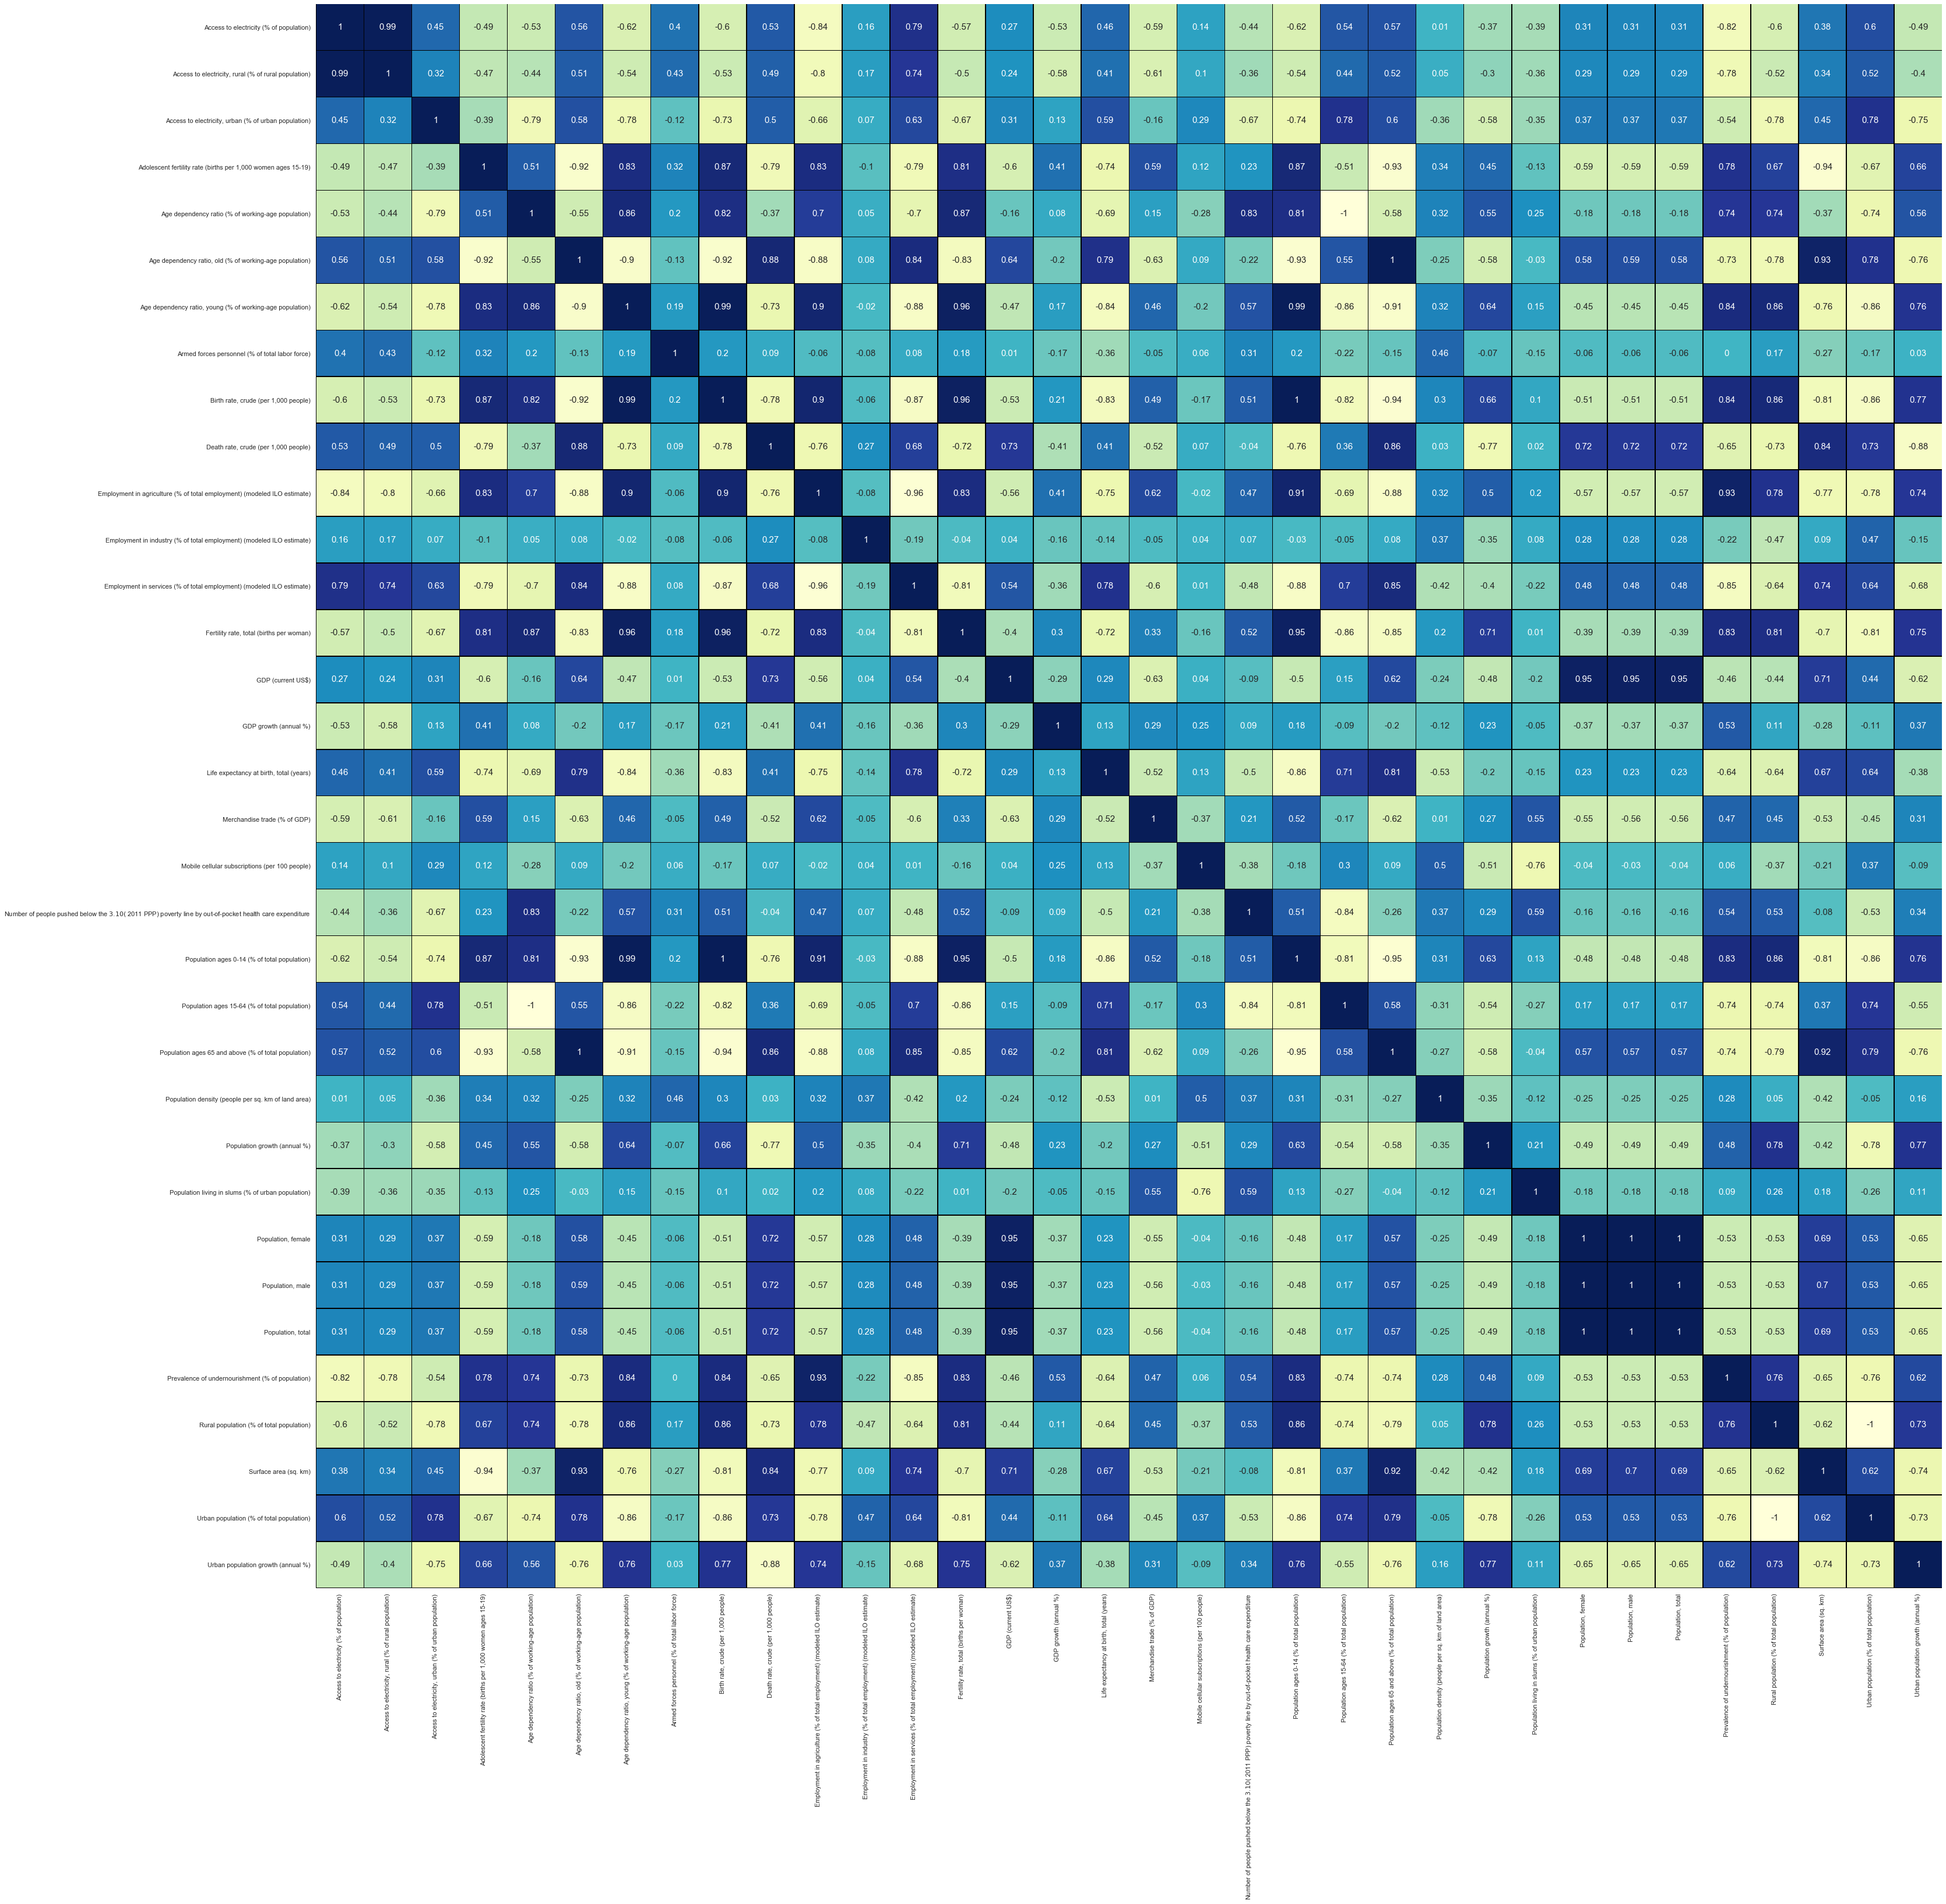

In [30]:
corr_no_Bermuda = EV_no_Bermuda.corr().round(2)
corr_no_Bermuda

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.rcParams['font.size'] = 30
sns.palplot(sns.color_palette("hls",12))
fig,ax = plt.subplots(figsize = (50,50))
sns.heatmap(corr_no_Bermuda,
            cmap = 'YlGnBu',
            square = False,
            annot = True, 
            linecolor = 'black', 
            linewidths = 0.5,
            annot_kws={'size':15},
            cbar = False,
            diagonal
            )

bottom,top = plt.ylim()
bottom += 0.5
top -= 0.5

plt.ylim(bottom, top)
plt.savefig('heatmap_all_no_Bermuda.jpg')
plt.show()

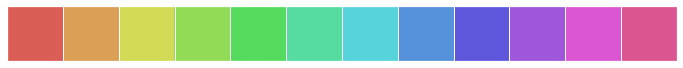

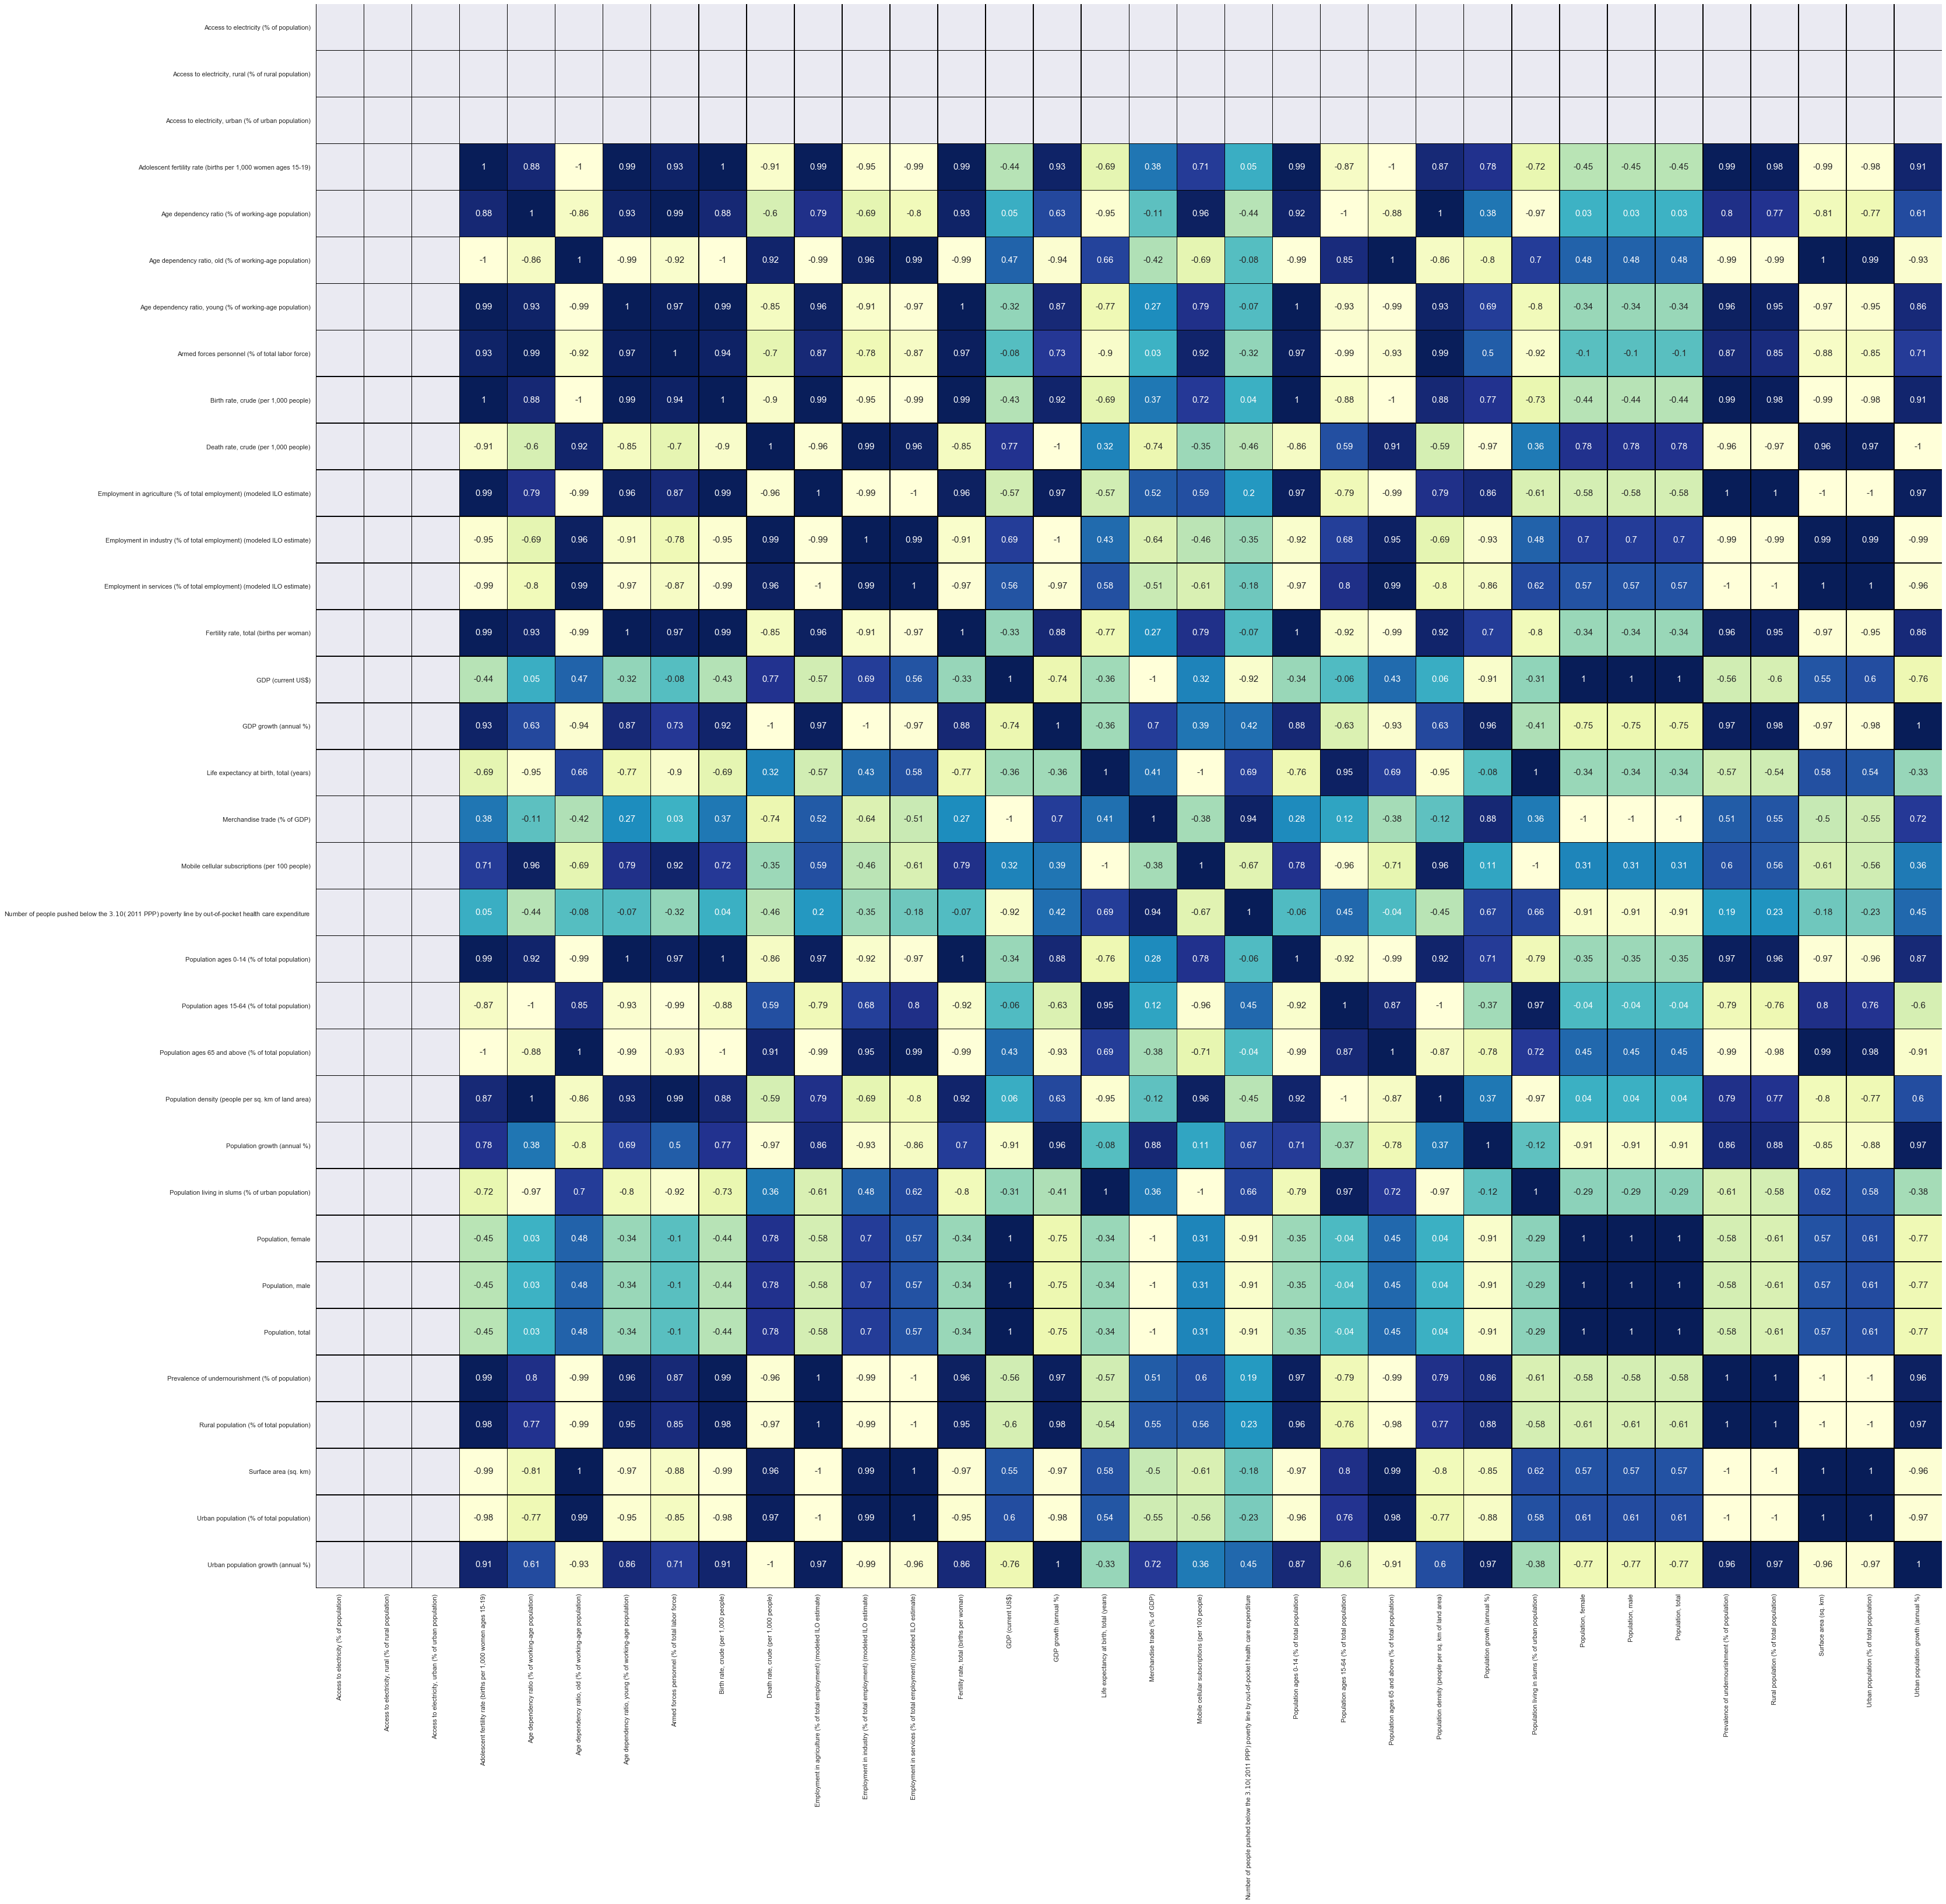

In [37]:
corr_no_Bermuda_High = EV_no_Bermuda_High.corr().round(2)

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.rcParams['font.size'] = 30
sns.palplot(sns.color_palette("hls",12))
fig,ax = plt.subplots(figsize = (50,50))
sns.heatmap(corr_no_Bermuda_High,
            cmap = 'YlGnBu',
            square = False,
            annot = True, 
            linecolor = 'black', 
            linewidths = 0.5,
            annot_kws={'size':15},
            cbar = False
            )

bottom,top = plt.ylim()
bottom += 0.5
top -= 0.5

plt.ylim(bottom, top)
plt.savefig('heatmap_all_no_Bermuda_high.jpg')
plt.show()

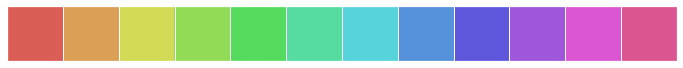

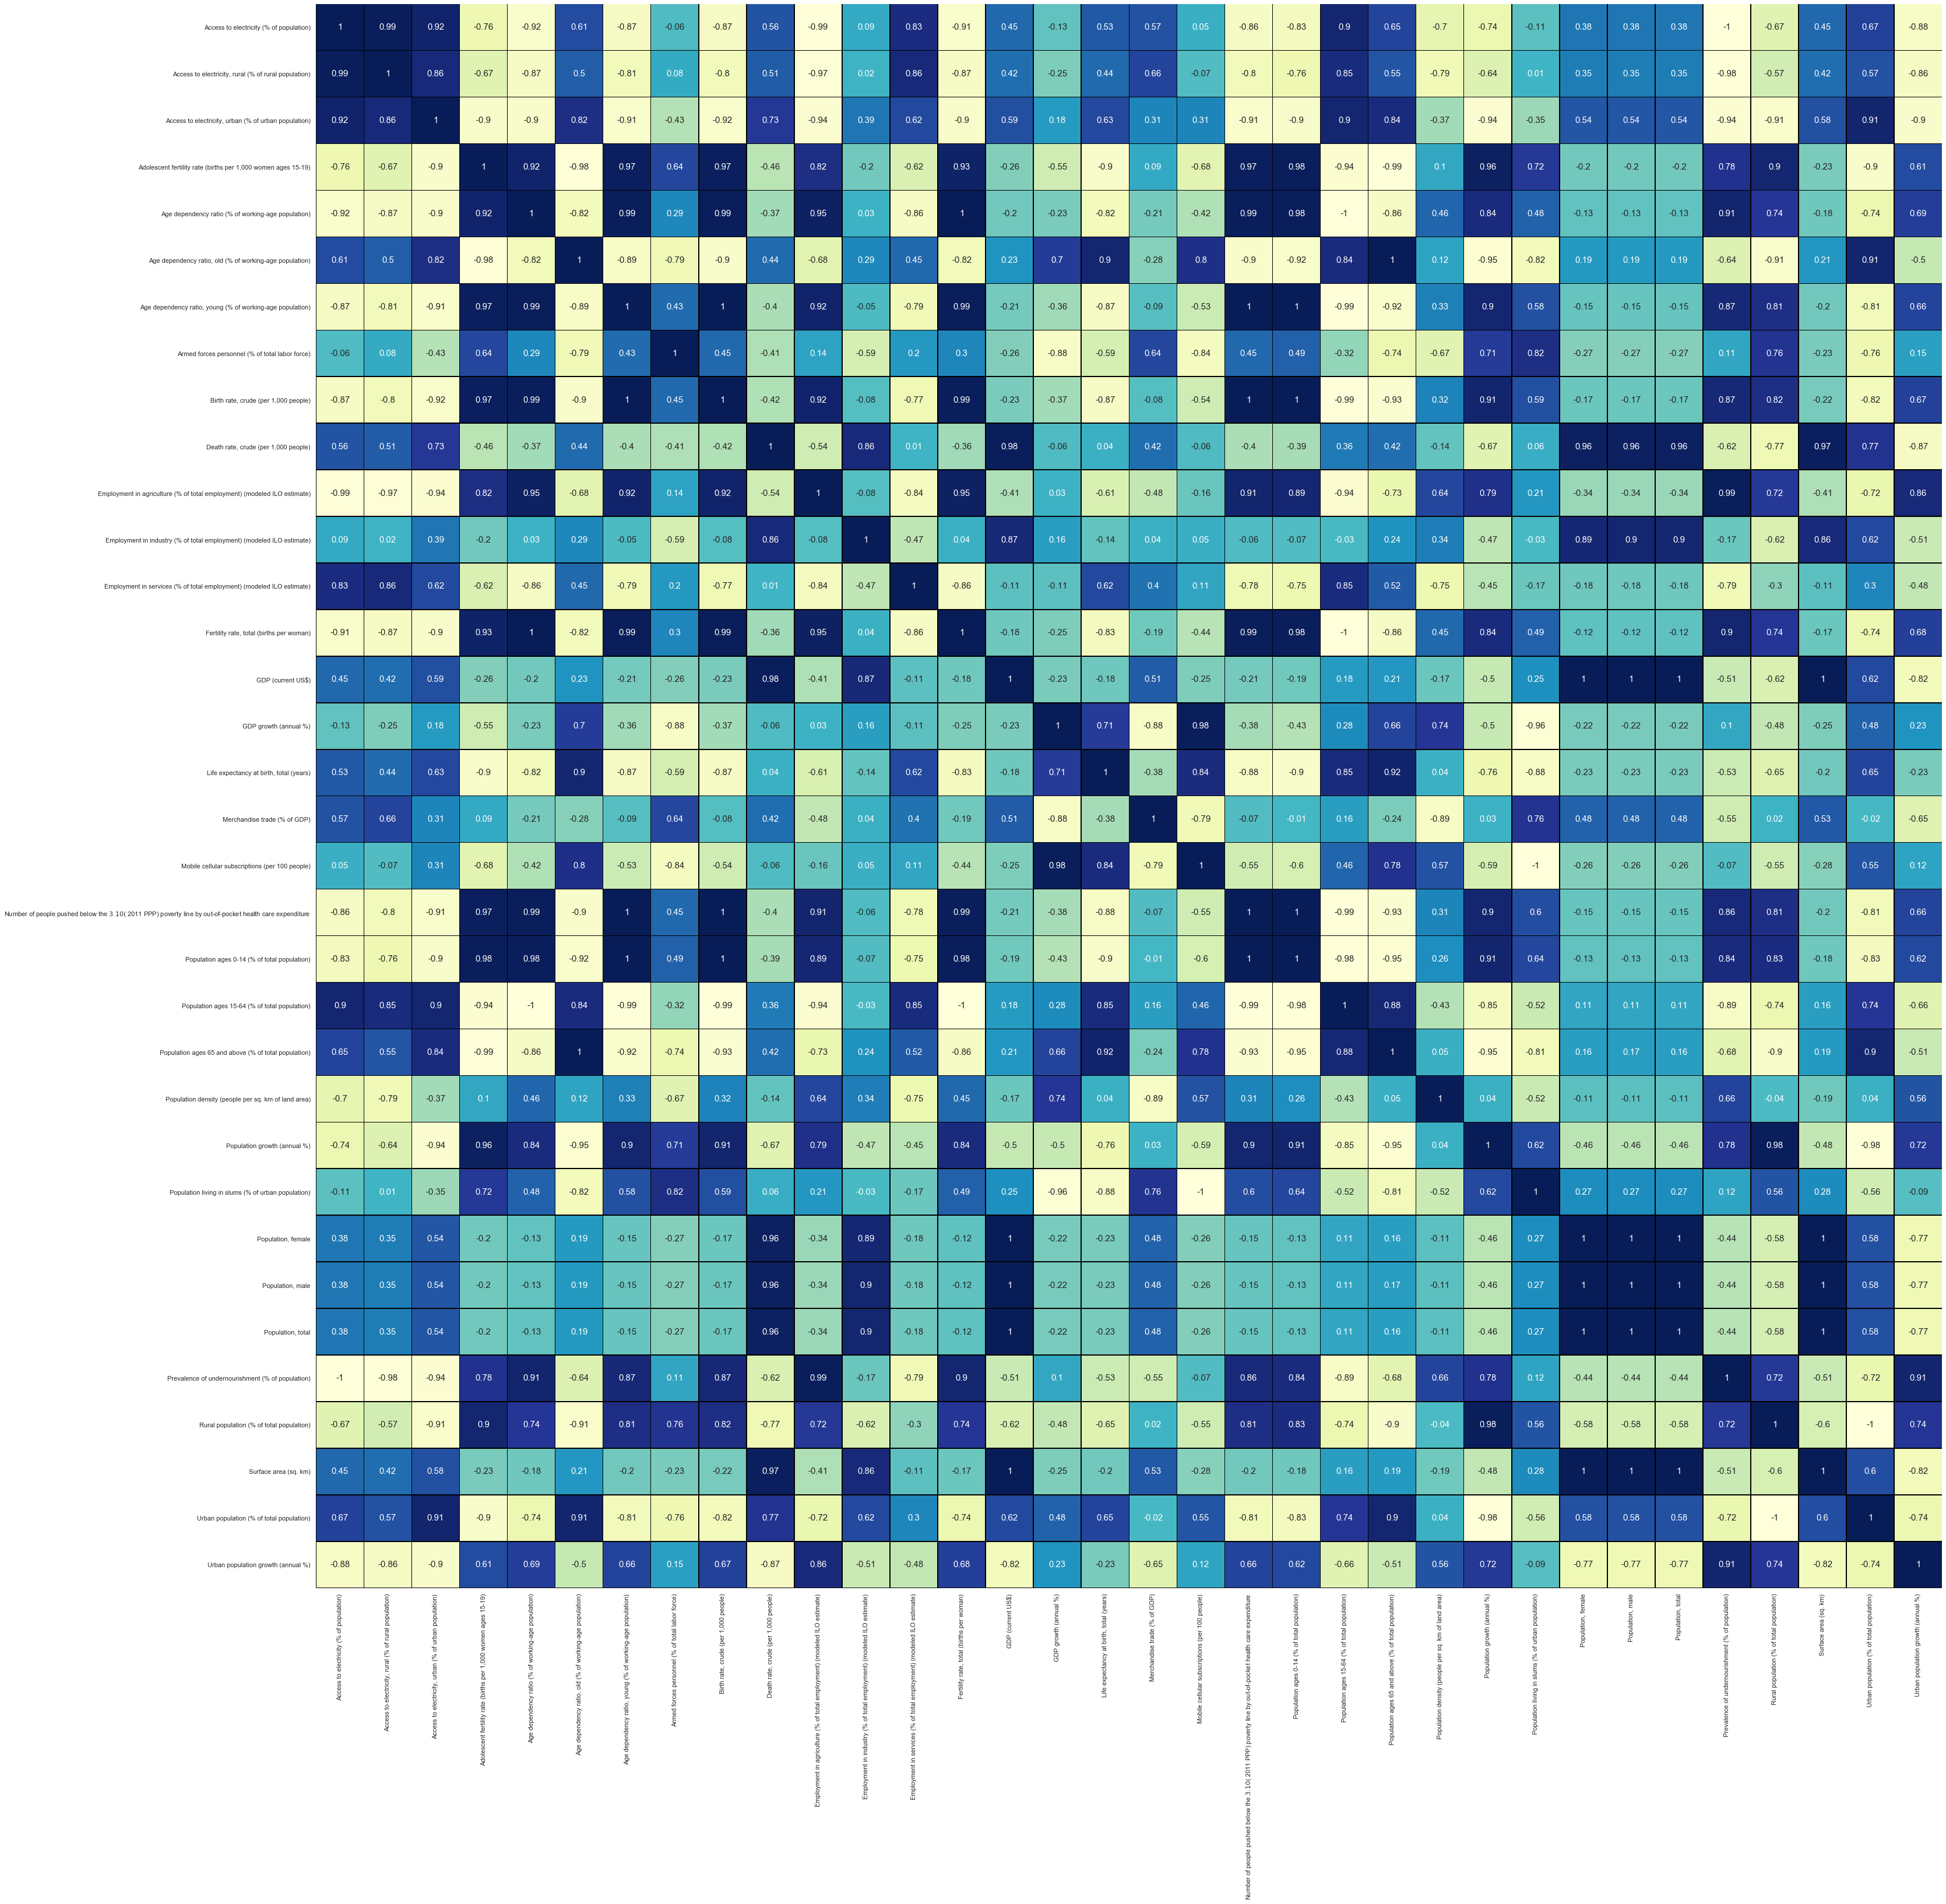

In [38]:
corr_no_Bermuda_upper_middle = EV_no_Bermuda_Upper_middle.corr().round(2)


sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.rcParams['font.size'] = 30
sns.palplot(sns.color_palette("hls",12))
fig,ax = plt.subplots(figsize = (50,50))
sns.heatmap(corr_no_Bermuda_upper_middle,
            cmap = 'YlGnBu',
            square = False,
            annot = True, 
            linecolor = 'black', 
            linewidths = 0.5,
            annot_kws={'size':15},
            cbar = False)

bottom,top = plt.ylim()
bottom += 0.5
top -= 0.5

plt.ylim(bottom, top)
plt.savefig('heatmap_all_no_Bermuda_upper_middle.jpg')
plt.show()

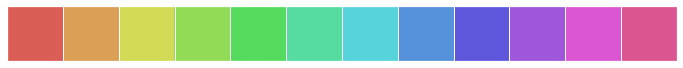

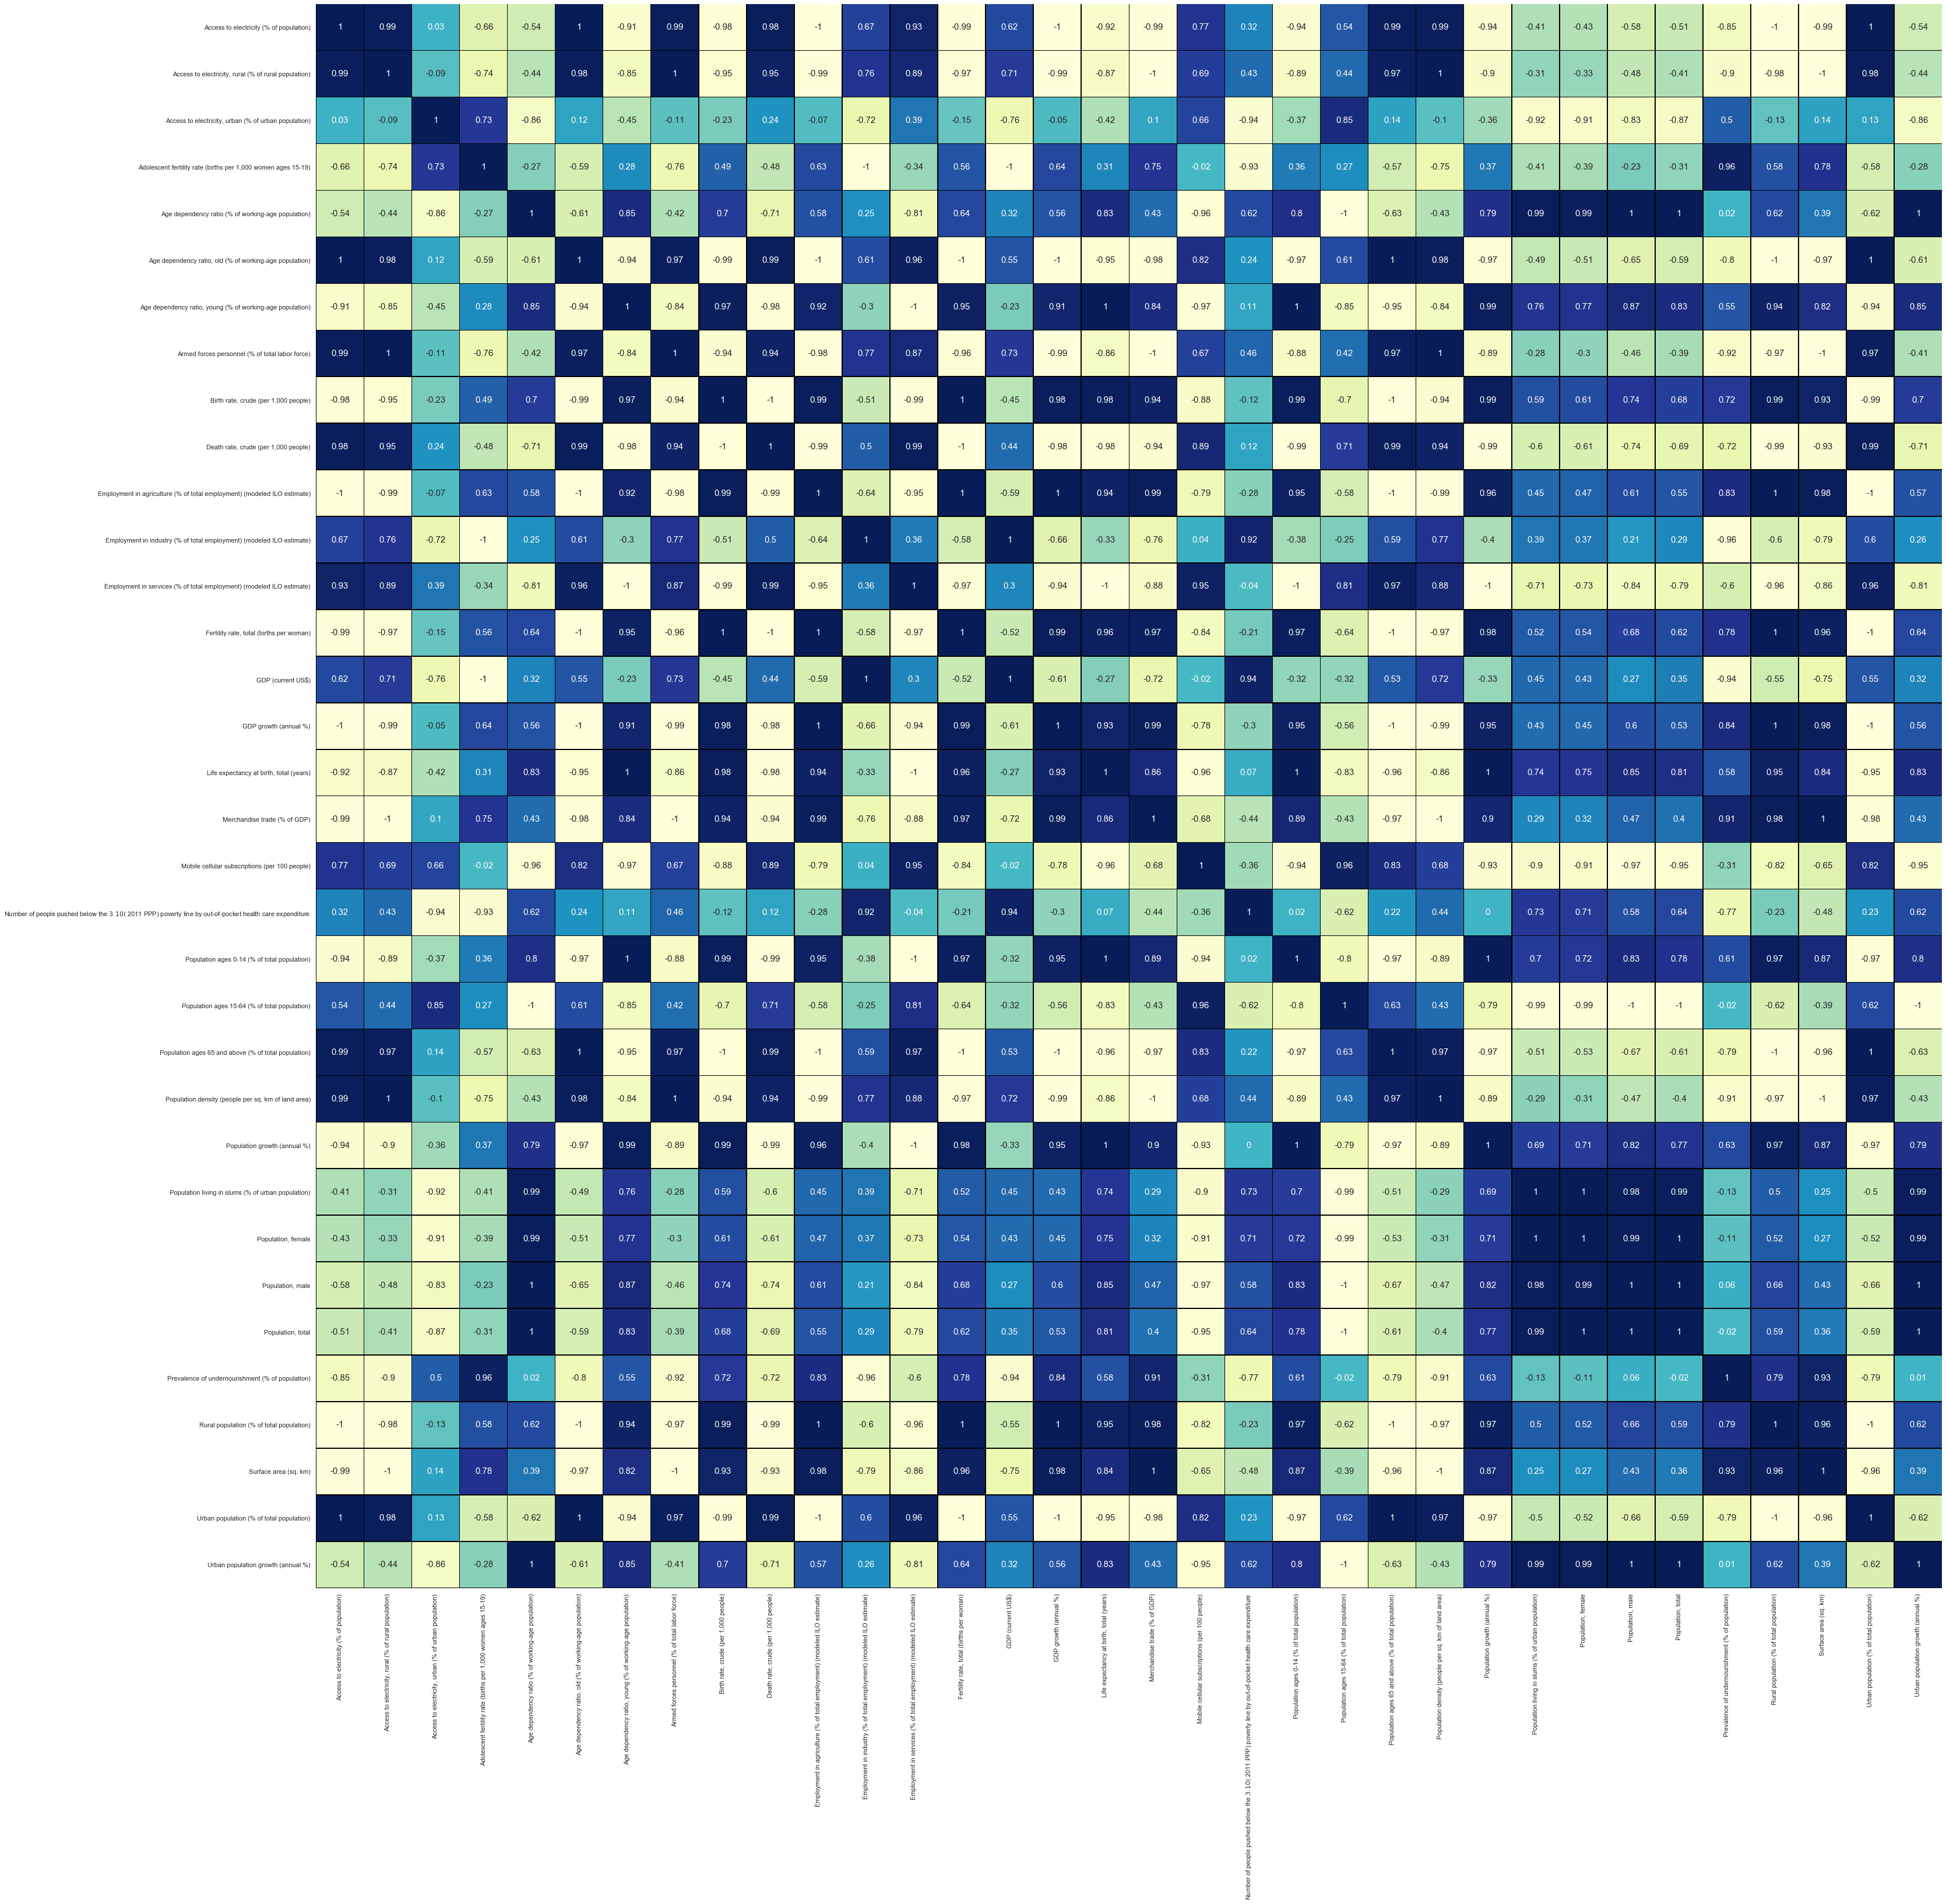

In [40]:
corr_no_Bermuda_lower_middle = EV_no_Bermuda_Lower_middle.corr().round(2)


sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.rcParams['font.size'] = 30
sns.palplot(sns.color_palette("hls",12))
fig,ax = plt.subplots(figsize = (50,50))
sns.heatmap(corr_no_Bermuda_lower_middle,
            cmap = 'YlGnBu',
            square = False,
            annot = True, 
            linecolor = 'black', 
            linewidths = 0.5,
            annot_kws={'size':15},
            cbar = False)

bottom,top = plt.ylim()
bottom += 0.5
top -= 0.5

plt.ylim(bottom, top)
plt.savefig('heatmap_all_no_Bermuda_lower_middle.jpg')
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

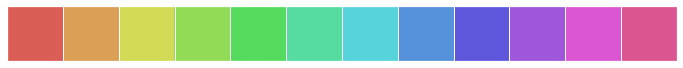

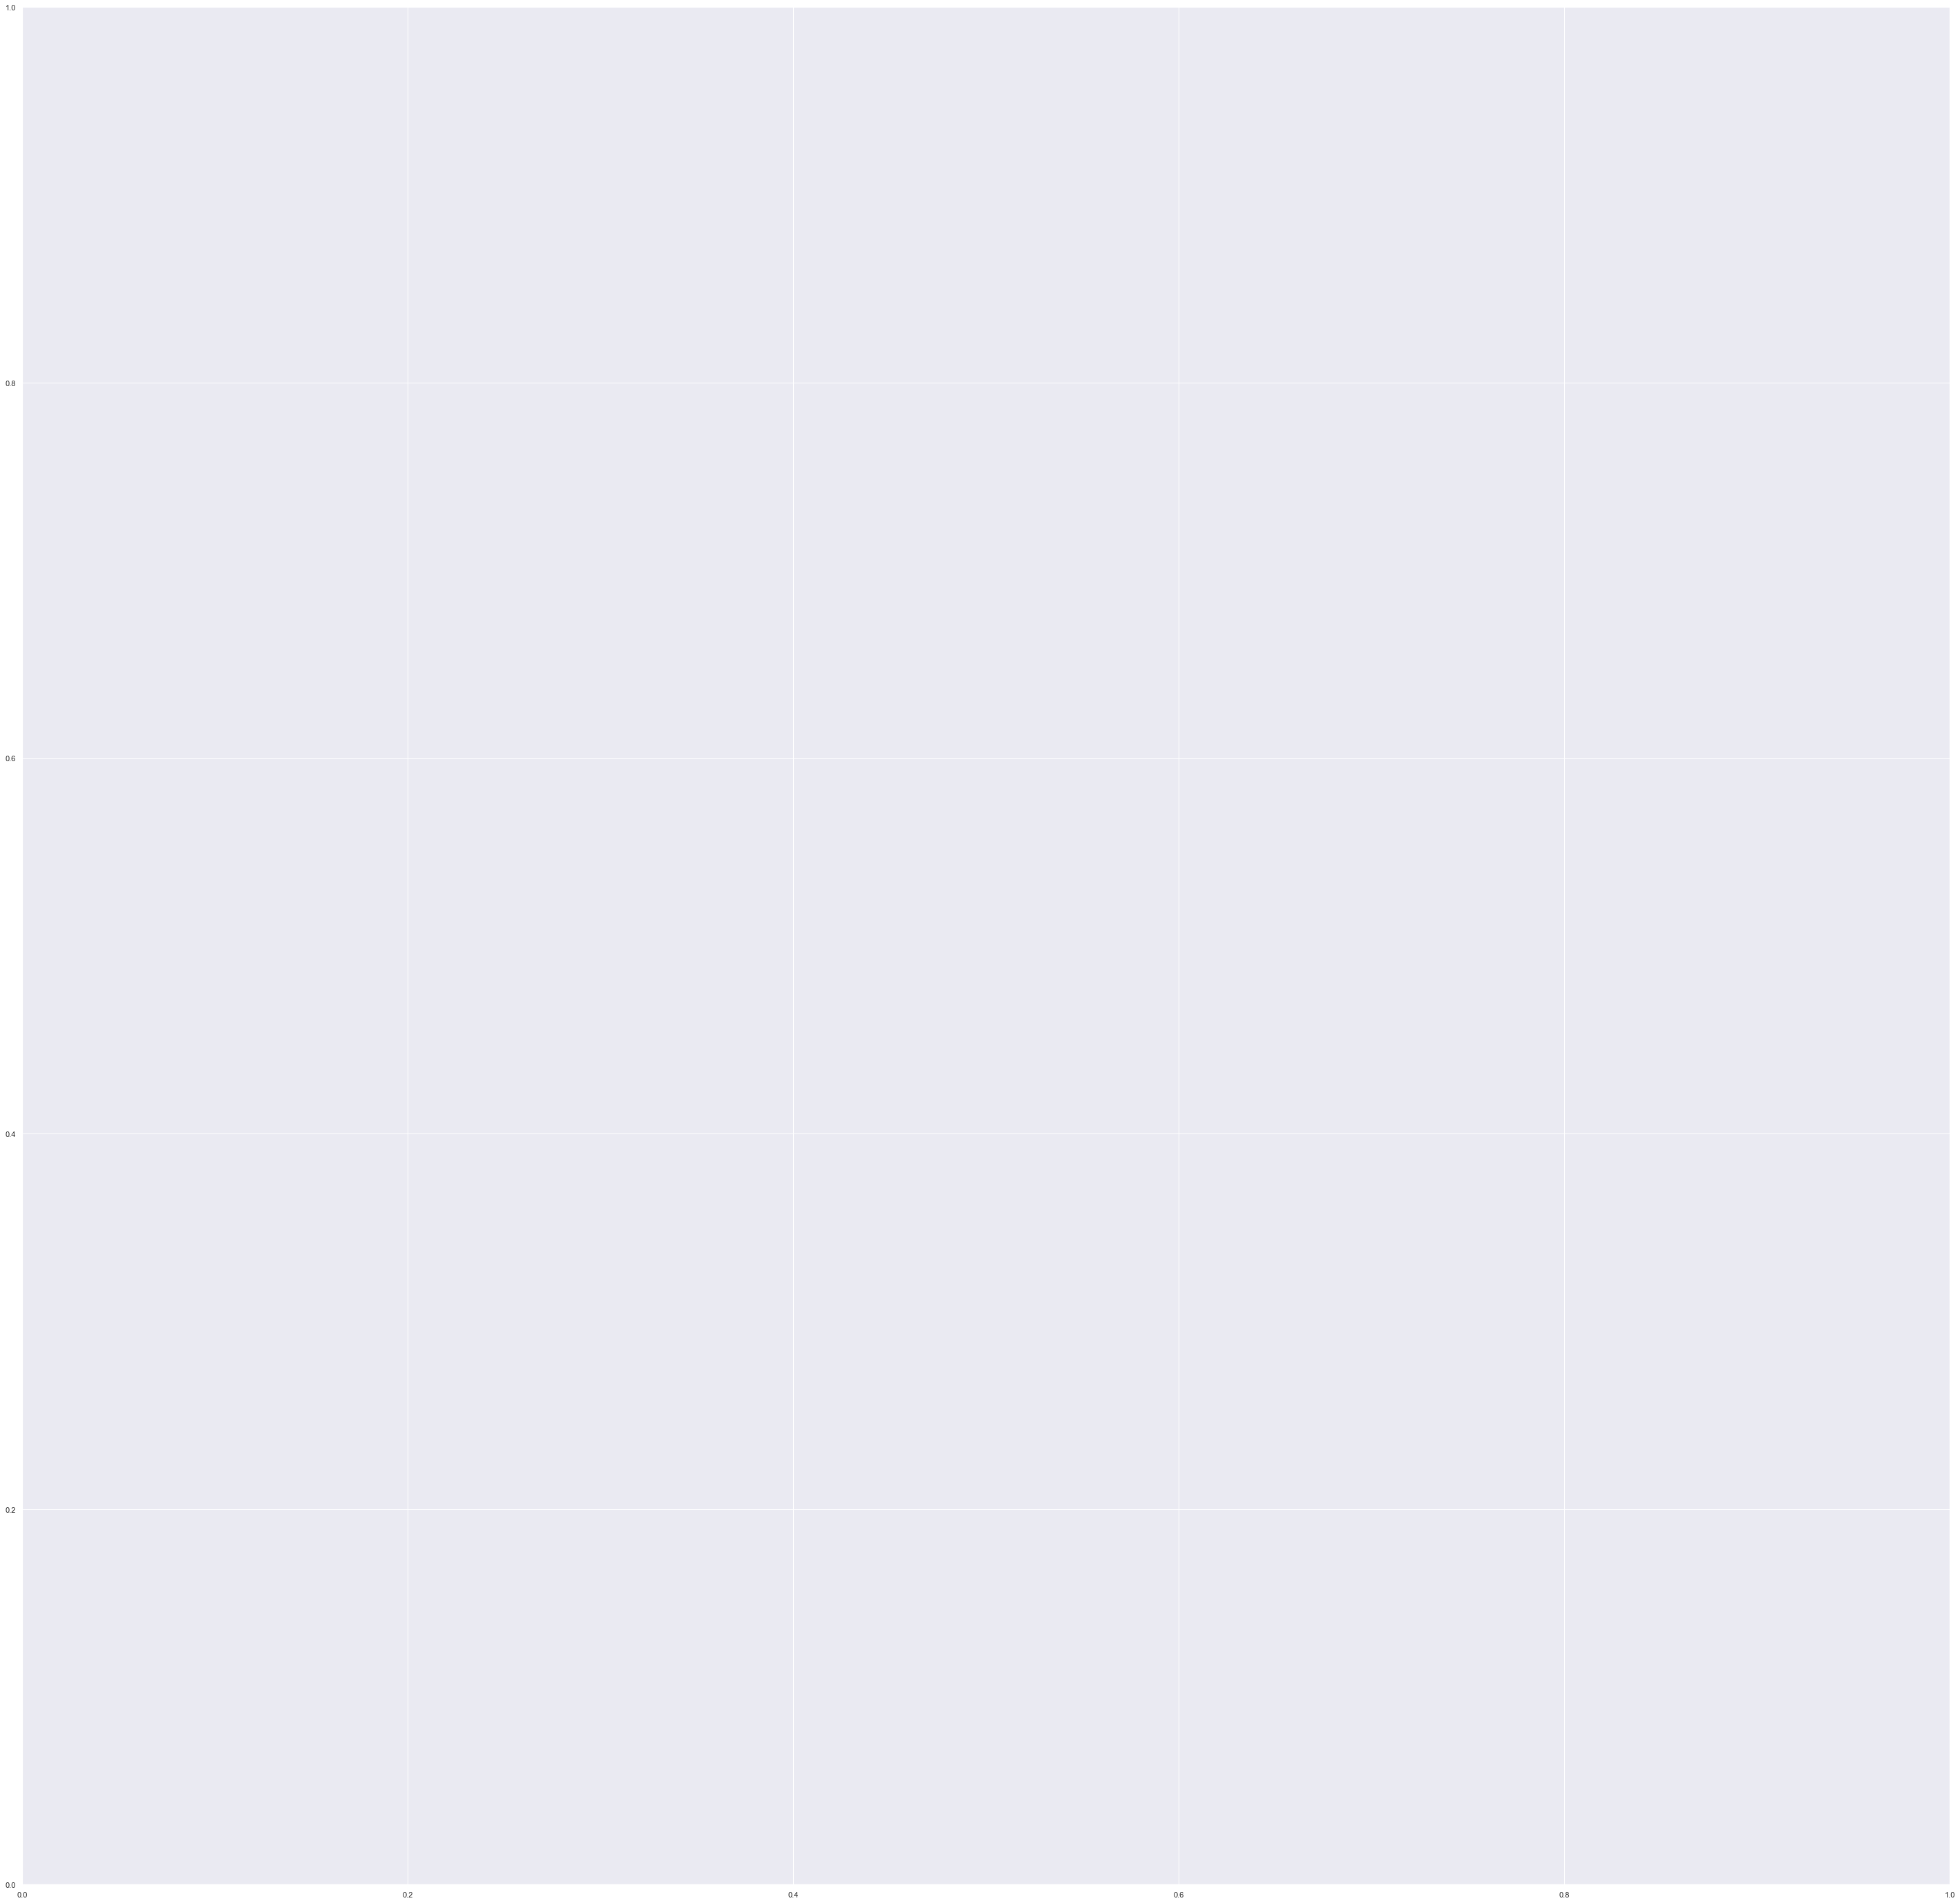

In [39]:
corr_no_Bermuda_low = EV_no_Bermuda_Low.corr().round(2)


sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.rcParams['font.size'] = 30
sns.palplot(sns.color_palette("hls",12))
fig,ax = plt.subplots(figsize = (50,50))
sns.heatmap(corr_no_Bermuda_low,
            cmap = 'YlGnBu',
            square = False,
            annot = True, 
            linecolor = 'black', 
            linewidths = 0.5,
            annot_kws={'size':15},
            cbar = False)

bottom,top = plt.ylim()
bottom += 0.5
top -= 0.5

plt.ylim(bottom, top)
plt.savefig('heatmap_all_no_Bermuda_low.jpg')
plt.show()